<a href="https://colab.research.google.com/github/Mihirgupta2001/EDA-Capstone-Project-Hotel-Booking/blob/main/EDA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Data Sets/Hotel Bookings.csv'
df = df=pd.read_csv(path)

In [ ]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# We can see that there are null values in countries, agent, children and company column
Put '0' for children

Put 'NaN' for agent

Put 'NaN' for Company

Put 'others' for Country

In [ ]:
df['children'].fillna(0,inplace = True)
df['agent'].fillna('NaN',inplace = True)
df['company'].fillna('NaN',inplace = True)
df['country'].fillna('others',inplace = True)

In [ ]:
#childrens cannot be in float, changing it to int
df['children'] = df['children'].astype(int)

In [ ]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Which hotels are having more cancellations, City or Resort? What is the percentage of people cancelling there booking?

In [89]:
#Counting the total number of canceled hotel bookings
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [90]:
#Counting the total numbers of Resort and City hotels were booked
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [91]:
# Seperating the relevant dataframe from the actual data and from there filtering out the canceled hotel bookings in Resort and City category hotels
relevant_df = df[['hotel','is_canceled','arrival_date_month','arrival_date_year']].copy()
relevant_df1 = relevant_df[(relevant_df['hotel'] == 'Resort Hotel') & (relevant_df['is_canceled'] == 1)]
relevant_df2 = relevant_df[(relevant_df['hotel'] == 'City Hotel') & (relevant_df['is_canceled'] == 1)]

In [92]:
# Grouping the data by Month and year and counting the total number of cancellations in each category
resort_cancel_data = relevant_df1.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()
city_cancel_data = relevant_df2.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()


In [93]:
# Splitting the data frame for cancelled bookings in resort accorindig to year 2015,2016,2017
resort_cancel_data_2015 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2015]
resort_cancel_data_2016 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2016]
resort_cancel_data_2017 = resort_cancel_data[resort_cancel_data['arrival_date_year']==2017]

# Splitting the data frame for cancelled bookings in City accorindig to year 2015,2016,2017
city_cancel_data_2015 = city_cancel_data[city_cancel_data['arrival_date_year']==2015]
city_cancel_data_2016 = city_cancel_data[city_cancel_data['arrival_date_year']==2016]
city_cancel_data_2017 = city_cancel_data[city_cancel_data['arrival_date_year']==2017]


In [94]:
# Getting the total number of booking in a particual month of a particular year
#filtering out the successful hotel bookings in Resort and City category hotels
relevant_df3 = relevant_df[(relevant_df['hotel'] == 'Resort Hotel') & (relevant_df['is_canceled'] == 0)]
relevant_df4 = relevant_df[(relevant_df['hotel'] == 'City Hotel') & (relevant_df['is_canceled'] == 0)]

# Grouping the data by Month and year and counting the total number of succesful hotel bookings in each category
resort_success_data = relevant_df3.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()
city_success_data = relevant_df4.groupby(['arrival_date_year','arrival_date_month'],as_index = False).count()

# Splitting the data frame for succesful accorindig to year 2015,2016,2017 for resort
resort_success_data_2015 = resort_success_data[resort_success_data['arrival_date_year']==2015].rename(columns = {'is_canceled':'is_not_canceled'})
resort_success_data_2016 = resort_success_data[resort_success_data['arrival_date_year']==2016].rename(columns = {'is_canceled':'is_not_canceled'})
resort_success_data_2017 = resort_success_data[resort_success_data['arrival_date_year']==2017].rename(columns = {'is_canceled':'is_not_canceled'})

# Splitting the data frame for successful bookings according to year 2015,2016,2017 for City
city_success_data_2015 = city_success_data[city_success_data['arrival_date_year']==2015].rename(columns = {'is_canceled':'is_not_canceled'})
city_success_data_2016 = city_success_data[city_success_data['arrival_date_year']==2016].rename(columns = {'is_canceled':'is_not_canceled'})
city_success_data_2017 = city_success_data[city_success_data['arrival_date_year']==2017].rename(columns = {'is_canceled':'is_not_canceled'})



In [95]:
# Merging to final data set for resort
resort_final_data_2015 = pd.merge(resort_cancel_data_2015,resort_success_data_2015,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2015.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2015 = resort_final_data_2015.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2015 = resort_final_data_2015.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2015 = resort_final_data_2015.Percentage_of_cancellation.mean()


resort_final_data_2016 = pd.merge(resort_cancel_data_2016,resort_success_data_2016,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2016.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2016 = resort_final_data_2016.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2016 = resort_final_data_2016.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2016 = resort_final_data_2016.Percentage_of_cancellation.mean()


resort_final_data_2017 = pd.merge(resort_cancel_data_2017,resort_success_data_2017,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
resort_final_data_2017.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
resort_final_data_2017 = resort_final_data_2017.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
resort_final_data_2017 = resort_final_data_2017.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_resort_2017 = resort_final_data_2017.Percentage_of_cancellation.mean()




In [103]:
# Merging to final data set for city
city_final_data_2015 = pd.merge(city_cancel_data_2015,city_success_data_2015,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2015.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2015 = city_final_data_2015.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2015 = city_final_data_2015.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2015 = city_final_data_2015.Percentage_of_cancellation.mean()


city_final_data_2016 = pd.merge(city_cancel_data_2016,city_success_data_2016,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2016.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2016 = city_final_data_2016.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2016 = city_final_data_2016.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2016 = city_final_data_2016.Percentage_of_cancellation.mean()


city_final_data_2017 = pd.merge(city_cancel_data_2017,city_success_data_2017,how = 'inner',left_on = 'arrival_date_month',right_on = 'arrival_date_month')
city_final_data_2017.drop(columns = ['arrival_date_year_x','hotel_x','arrival_date_year_y','hotel_y'],inplace = True)
city_final_data_2017 = city_final_data_2017.assign(Total_booking = lambda x: x.is_canceled + x.is_not_canceled)
city_final_data_2017 = city_final_data_2017.assign(Percentage_of_cancellation = lambda x: (x.is_canceled / x.Total_booking)*100)
percent_mean_city_2017 = city_final_data_2017.Percentage_of_cancellation.mean()



In [104]:
# Defining the mean percentage of cancellation every year as array
percent_array = np.array([[percent_mean_city_2015,percent_mean_city_2016,percent_mean_city_2017],[percent_mean_resort_2015,percent_mean_resort_2016,percent_mean_resort_2017]])


In [105]:
# Converting the array to dataframe which would be used to plot
plotting_df = pd.DataFrame(percent_array, columns = ['2015','2016','2017'])
plotting_df


,2015,2016,2017
0,44.056872,39.79301,41.921989
1,25.159454,25.97572,30.144915


[Text(0, 0, 'City Hotel'), Text(0, 0, 'Resort Hotel')]

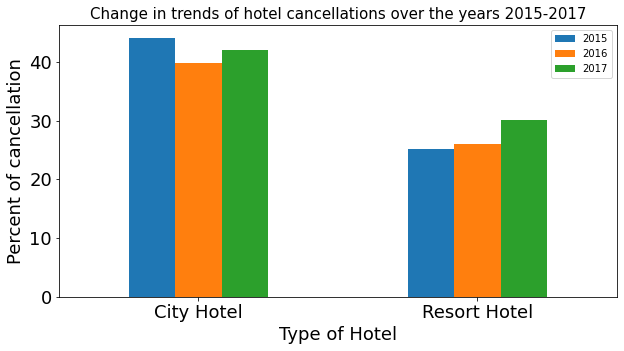

In [106]:
# Plotting the Graph
plotting = plotting_df.plot.bar(figsize = (10,5),fontsize = 18)
plotting.set_title('Change in trends of hotel cancellations over the years 2015-2017', fontsize = 15)
plotting.set_xlabel('Type of Hotel', fontsize = 18)
plotting.set_ylabel('Percent of cancellation', fontsize = 18)
plotting.set_xticklabels(['City Hotel','Resort Hotel'],rotation=0) 


From the above Bar graph we can see that City hotels face more cancellation (in percentage) than Resort hotels

On the other hand side we can also observe that percentage of cancellations are also increasing in Resort hotels over the years 2015-17.

# 2. Finding the distribution of repeating guest in City and Resort hotels

In [ ]:
#checking the distribution of data in relevant column
df.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
# Setting the relevant dataframe for the question
relevant_df = df[['hotel','is_repeated_guest']].copy()

In [ ]:
# Manipulating the data to get the neccesary distribution 
relevant_df1 = relevant_df.groupby(['is_repeated_guest','hotel']).agg({'hotel':'count'},as_index = False).rename(columns = {'hotel':'count'})
relevant_df1

count
is_repeated_guest hotel              
0                 City Hotel    77298
                  Resort Hotel  38282
1                 City Hotel     2032
                  Resort Hotel   1778

Text(0.5, 0, 'Type of Hotel subject to repetition')

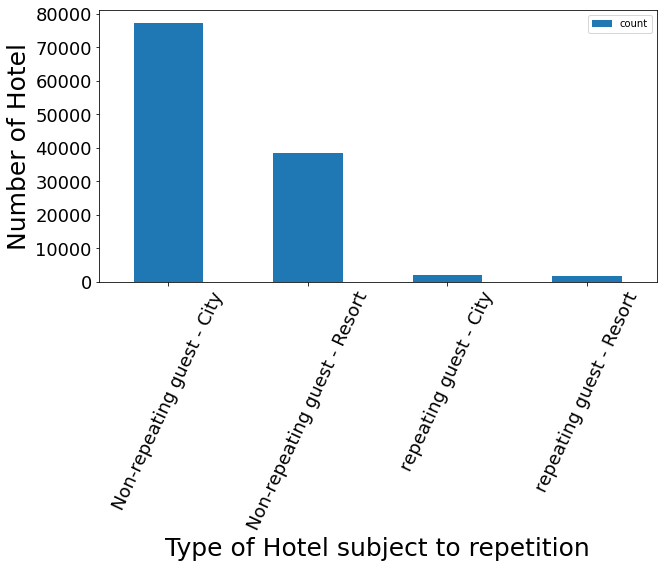

In [ ]:
# Visual Representation of the obtained data
plot1 = relevant_df1.plot.bar(figsize = (10,5),fontsize = 18)
plot1.set_xticklabels(['Non-repeating guest - City','Non-repeating guest - Resort','repeating guest - City','repeating guest - Resort'],rotation=65) 
plot1.set_ylabel('Number of Hotel', fontsize = 25)
plot1.set_xlabel('Type of Hotel subject to repetition', fontsize = 25)


From the above Bar-Plot we can oberve that repetition is fairly low in Hotels

In [ ]:
#let us dive down in repeating guest
relevant_df2 = relevant_df1.drop(0)
relevant_df2


count
is_repeated_guest hotel              
1                 City Hotel     2032
                  Resort Hotel   1778

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


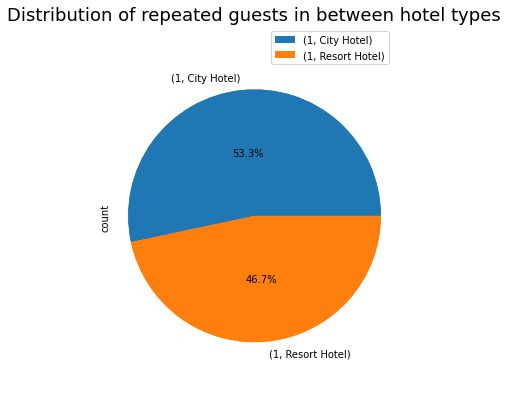

In [ ]:
# Plotting the distribution of repeating guest in a Piechart
plot2 = relevant_df2.plot.pie(y = 'count',figsize = (5,7),)
plot2.pie(relevant_df2, autopct="%.1f%%", pctdistance=0.5)
plt.title('Distribution of repeated guests in between hotel types', fontsize = 18)
plt.axis('equal')
plt.show()


From the above Piechart we can draw the conclusion that although the relative percentage of distribution of guest is same, but City Hotels have higher retaining guest rate than Resort Hotels 

# 3. From Which countries people mostly visit to hotels, How is the trend and in which year maximum number of people visited from these countries?What is the most busiest year?


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [83]:
# We are considering top 5 countries of most guest
relevant_df = df[['hotel','country','arrival_date_year']].copy()
booking_country = relevant_df.groupby(['arrival_date_year','country'],as_index = False).count()
booking_country


,arrival_date_year,country,hotel
0,2015,AGO,50
1,2015,ALB,2
2,2015,ARG,14
3,2015,ARM,1
4,2015,AUS,27
...,...,...,...
393,2017,UZB,3
394,2017,VEN,6
395,2017,VNM,3
396,2017,ZAF,39


In [84]:

# Extracting data for year 2015
booking_country_2015 = booking_country[booking_country['arrival_date_year']==2015]
booking_country_2015.sort_values(by = 'hotel', ascending = False,inplace = True)
booking_country_2015 = booking_country_2015.rename(columns = {'hotel':'No_of_people'})
booking_country_2015 = booking_country_2015[:5]
booking_country_2015.drop('arrival_date_year',axis = 'columns',inplace = True)
booking_country_2015


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,country,No_of_people
75,PRT,13307
28,ESP,1932
33,GBR,1356
32,FRA,1348
45,ITA,547


In [85]:

# Extracting data for year 2016
booking_country_2016 = booking_country[booking_country['arrival_date_year']==2016]
booking_country_2016.sort_values(by = 'hotel', ascending = False,inplace = True)
booking_country_2016 = booking_country_2016.rename(columns = {'hotel':'No_of_people'})
booking_country_2016 = booking_country_2016[:5]
booking_country_2016.drop('arrival_date_year',axis = 'columns',inplace = True)
booking_country_2016


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,country,No_of_people
214,PRT,22321
148,GBR,5585
146,FRA,5165
143,ESP,4024
136,DEU,3865


In [86]:

# Extracting data for year 2017
booking_country_2017 = booking_country[booking_country['arrival_date_year']==2017]
booking_country_2017.sort_values(by = 'hotel', ascending = False,inplace = True)
booking_country_2017 = booking_country_2017.rename(columns = {'hotel':'No_of_people'})
booking_country_2017 = booking_country_2017[:5]
booking_country_2017.drop('arrival_date_year',axis = 'columns',inplace = True)
booking_country_2017


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,country,No_of_people
363,PRT,12962
300,GBR,5188
297,FRA,3902
285,DEU,2898
292,ESP,2612


In [87]:
#Merging the dataset
Merged_df_2015_2016 = pd.merge(booking_country_2015,booking_country_2016,how = 'outer',left_on = 'country',right_on = 'country')
Merged_df_2015_2016_2017 = pd.merge(Merged_df_2015_2016,booking_country_2017,how = 'outer',left_on = 'country',right_on = 'country')

# Creating the final Dataset for plotting
Final_df = Merged_df_2015_2016_2017.rename(columns={'No_of_people_x':2015,'No_of_people_y':2016,'No_of_people':2017})
Final_df.fillna(0,inplace = True)
Final_df.drop(index = [4,5] , inplace = True)
Final_df

,country,2015,2016,2017
0,PRT,13307.0,22321.0,12962.0
1,ESP,1932.0,4024.0,2612.0
2,GBR,1356.0,5585.0,5188.0
3,FRA,1348.0,5165.0,3902.0


[Text(0, 0, 'PRT'), Text(0, 0, 'ESP'), Text(0, 0, 'GBR'), Text(0, 0, 'FRA')]

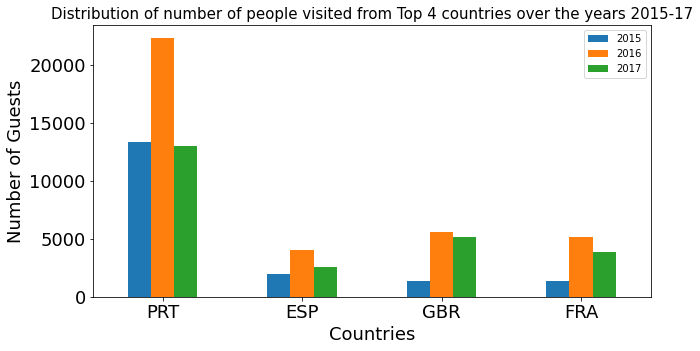

In [88]:
# Plotting the Graph
plotting = Final_df.plot.bar(figsize = (10,5),fontsize = 18)
plotting.set_title('Distribution of number of people visited from Top 4 countries over the years 2015-17', fontsize = 15)
plotting.set_xlabel('Countries', fontsize = 18)
plotting.set_ylabel('Number of Guests', fontsize = 18)
plotting.set_xticklabels(['PRT','ESP','GBR','FRA'],rotation=0) 


From the above bar graph we can clearly people visited from PRT,ESP,GBR,FRA is more than any other country in the dataframe and it can also be observed that in 2017 maximum number of people came to hotels, thus making it the busiest year

 # 4. What is the optimal length of stay in order to get the best daily rate?

In [64]:
relevant_df = df[['adr','stays_in_week_nights','stays_in_weekend_nights']].copy()

relevant_df.describe()

,adr,stays_in_week_nights,stays_in_weekend_nights
count,119390.000000,119390.000000,119390.000000
mean,101.831122,2.500302,0.927599
std,50.535790,1.908286,0.998613
min,-6.380000,0.000000,0.000000
25%,69.290000,1.000000,0.000000
50%,94.575000,2.000000,1.000000
75%,126.000000,3.000000,2.000000
max,5400.000000,50.000000,19.000000


In [65]:
# Adding total stay in our relevant dataframe
relevant_df['total_stay'] = relevant_df['stays_in_weekend_nights'] + relevant_df['stays_in_week_nights']
# Adding average amount paid in our relevant dataframe
relevant_df['average_amount_paid'] = relevant_df['total_stay'] * relevant_df['adr']


In [66]:
relevant_df.describe()

,adr,stays_in_week_nights,stays_in_weekend_nights,total_stay,average_amount_paid
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,101.831122,2.500302,0.927599,3.427900,357.848208
std,50.535790,1.908286,0.998613,2.557439,335.910109
min,-6.380000,0.000000,0.000000,0.000000,-63.800000
25%,69.290000,1.000000,0.000000,2.000000,146.000000
50%,94.575000,2.000000,1.000000,3.000000,267.000000
75%,126.000000,3.000000,2.000000,4.000000,446.250000
max,5400.000000,50.000000,19.000000,69.000000,7590.000000


'adr' is our Average Daily Rate, so this particular value cannot be 0 or it will mean that the City hotel or the Resort hotel is free to stay, also it cannot be a negative value because that will not make any sense.

In [67]:
# Calculating the irrelevant rows in the data frame according to adr, in the negative side of the numberline
outlier_in_adr = relevant_df[relevant_df['adr'] <= 0].adr.count()
outlier_in_adr

1960

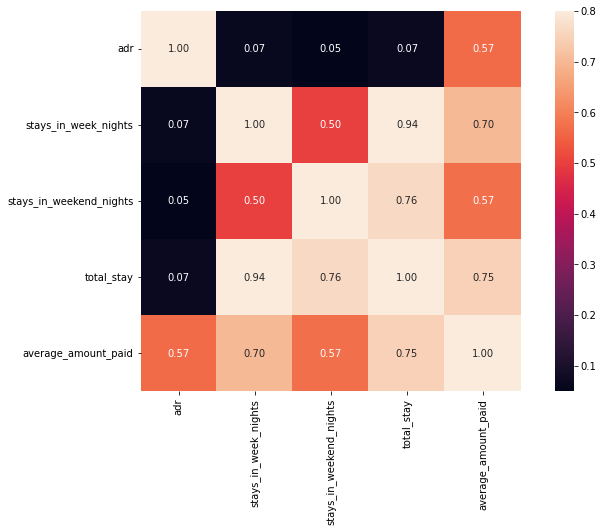

In [68]:
# let us look at the correlation matrix of our relevant dataframe
corr_mat = relevant_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

From the above correlation matrix we can deduce that we have a strong correlation between the following pairs:

1. total stays and stays in week nights

2. total stays and stays in weekend nights

3. total stays and average amount paid

Let us now try to exclude the outliers with the help of these correlations

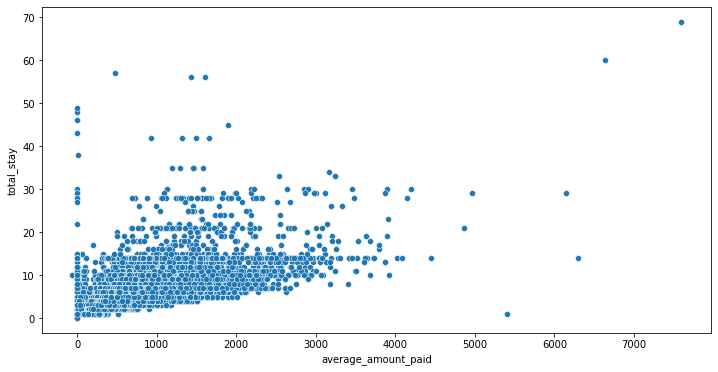

In [69]:
# Plotting the scatterplot to determine the outliers in the positive side of the numberline 
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_stay', x = 'average_amount_paid', data = relevant_df)
plt.show()

So from this above scatterplot we can make the following observations

1. All the payments made to the hotel above 5000 are outliers in the dataset

2. All total night stays which is above 50 is also an outlier

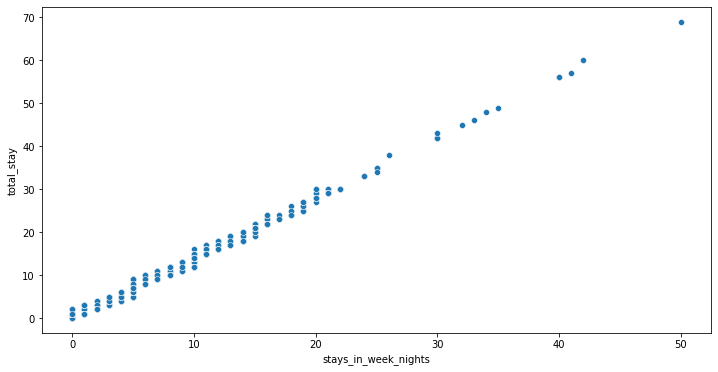

In [70]:
# Plotting the scatterplot to determine the outliers in the positive side of the numberline 
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_stay', x = 'stays_in_week_nights', data = relevant_df)
plt.show()

From the above scatterplot it is clear that we have outliers starting from somewhere in the range 30 to 40

In [71]:
# Checking for the terminal point of our dataset afterwhich we will name the rest of the data as Outlier through hit and trial method
outlier_in_stays_in_week_nights = relevant_df[relevant_df['stays_in_week_nights'] > 35].adr.count()
outlier_in_stays_in_week_nights

5

So we can see that the values greater than 35 are all outliers

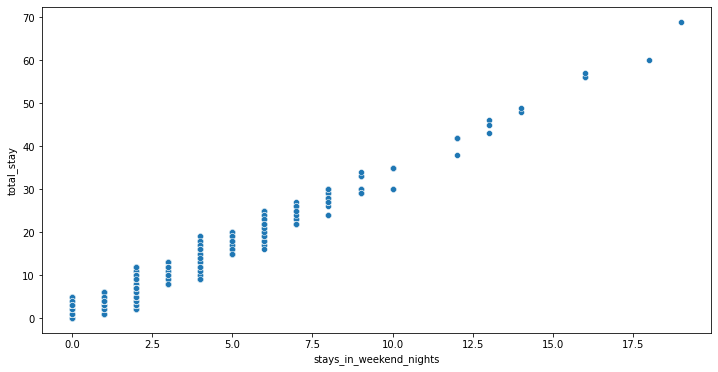

In [72]:
# Plotting the scatterplot to determine the outliers in the positive side of the numberline 
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'total_stay', x = 'stays_in_weekend_nights', data = relevant_df)
plt.show()

In [73]:
# Checking for the terminal point of our dataset afterwhich we will name the rest of the data as Outlier through hit and trial method
outlier_in_stays_in_weekend_nights = relevant_df[relevant_df['stays_in_weekend_nights'] > 15].adr.count()
outlier_in_stays_in_weekend_nights

5

In [74]:
# dropping the irrelevant data (removing outliers from both negative and positive side of the numberline)
relevant_df.drop(relevant_df[relevant_df['adr'] <= 0].index, inplace = True)
relevant_df.drop(relevant_df[relevant_df['average_amount_paid'] >5000].index, inplace = True)
relevant_df.drop(relevant_df[relevant_df['total_stay'] > 50].index, inplace = True)
relevant_df.drop(relevant_df[relevant_df['stays_in_week_nights'] > 35].index, inplace = True)
relevant_df.drop(relevant_df[relevant_df['stays_in_weekend_nights'] > 15].index, inplace = True)

In [75]:
# Calculating the total number of outliers and its percentage
dropped_rows = df.adr.count() - relevant_df.adr.count()
dropped_rows_percent = (dropped_rows/df.adr.count())*100
print(f"The percentage of outlier are = {dropped_rows_percent} %")

The percentage of outlier are = 1.6483792612446604 %


In [76]:
relevant_df.describe()

,adr,stays_in_week_nights,stays_in_weekend_nights,total_stay,average_amount_paid
count,117422.000000,117422.000000,117422.000000,117422.000000,117422.000000
mean,103.483835,2.519306,0.935659,3.454966,363.543269
std,46.695513,1.874590,0.989968,2.506794,333.091429
min,0.260000,0.000000,0.000000,1.000000,1.000000
25%,70.530000,1.000000,0.000000,2.000000,151.000000
50%,95.000000,2.000000,1.000000,3.000000,270.000000
75%,126.000000,3.000000,2.000000,4.000000,450.000000
max,510.000000,32.000000,13.000000,45.000000,4967.700000


Dropping the outliers shouldn't decrease the Correlation between the data, let us look at the correlation matrix with the new dataframe to determine wheather our identification of outliers effected in any negative way or not.

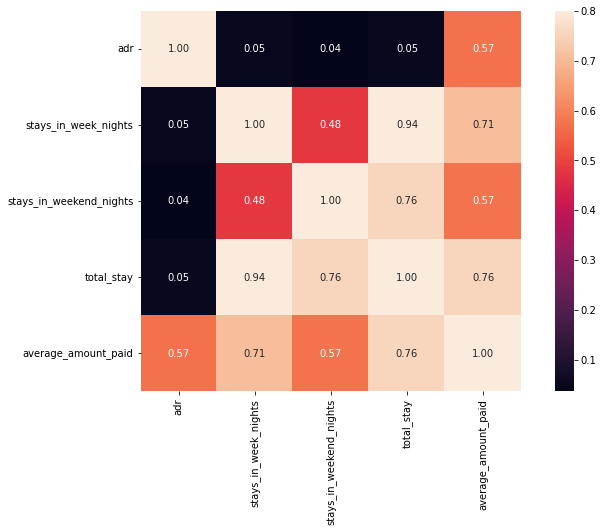

In [77]:
# looking at the correlation matrix of our relevant dataframe to check wheather dropping the irrelevant rows did any negative impact or not
corr_mat = relevant_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

As we have only dropped 1.6483792612446604 % of data as our correlation matrix is not changed.

In [78]:
# Checking the dataframe for duplicated values
relevant_df[relevant_df.duplicated()].shape


(92294, 5)

In [79]:
# Dropping the duplicate values
relevant_df.drop_duplicates(inplace = True)

In [80]:
relevant_df.describe()

,adr,stays_in_week_nights,stays_in_weekend_nights,total_stay,average_amount_paid
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,119.894787,3.654728,1.473854,5.128582,601.128775
std,60.867529,2.569327,1.178447,3.452349,489.630343
min,0.260000,0.000000,0.000000,1.000000,1.000000
25%,75.100000,2.000000,1.000000,3.000000,266.000000
50%,107.920000,3.000000,2.000000,4.000000,466.000000
75%,153.812500,5.000000,2.000000,7.000000,783.425000
max,510.000000,32.000000,13.000000,45.000000,4967.700000


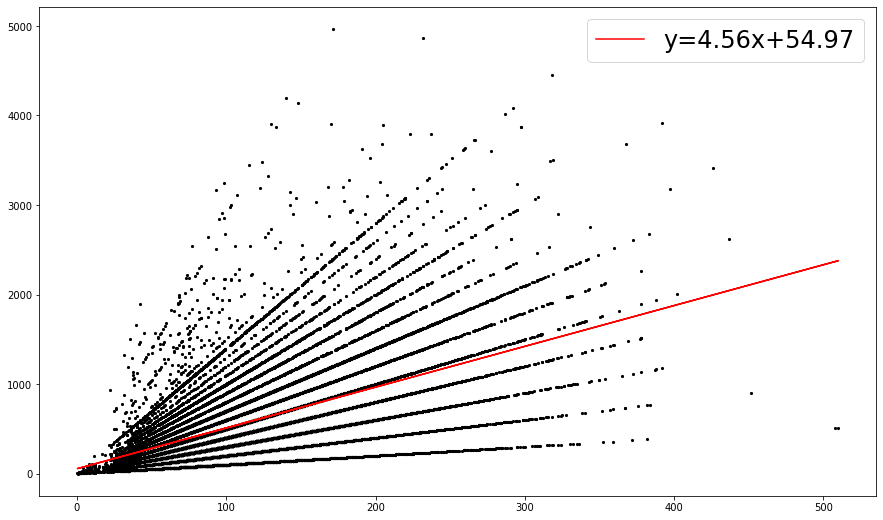

In [81]:
# Determining the data sets for linear regression
x=relevant_df['adr']
y=relevant_df['average_amount_paid']

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Setting up the line equation y = mx + c
line = slope*x+intercept

# Plotting the graph
plt.figure(figsize = (15,9))
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.scatter(x,y, color="k", s=4.5)
plt.legend(fontsize=24)

plt.show()


The red line in graph shows the linear regression model for the following data

The Slope of this line is amount paid divided by adr on that particular point

We have the line equation as **y = 4.56x + 54.97** , we know that general equation of a line is **y = mx +c** where m is our slope.

So if we compare, then we are getting **m = 4.56** 

Now total stays has to be a integer type number, so if we try to round off, we will have the value for optimal stay as **5**